In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from typing import Literal
from sklearn import manifold
from scipy.spatial import distance_matrix

In [2]:
import utils

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def cmp_dist_matrices(W1, W2, mode: Literal['l1_norm', 'nearest_neighbors', 'ranked_nearest_neighbors', 'F_norm'], n_neighbors: int = 20):
    if mode == "ranked_nearest_neighbors":
        delta = np.argsort(np.argsort(W1, axis=1), axis=1) - np.argsort(np.argsort(W2, axis=1), axis=1)
        res = np.sum(np.abs(delta[:,:n_neighbors+1]))
        return res
    elif mode == "nearest_neighbors":
        l1 = np.argsort(W1, axis=1)[:,:n_neighbors+1]
        l2 = np.argsort(W2, axis=1)[:,:n_neighbors+1]
        res = 0
        for x, y in zip(l1, l2):
            res += len(set(x).symmetric_difference(set(y)))
        return res
    elif mode == "l1_norm":
        W1_normed = W1 / np.linalg.norm(W1, ord=1)
        W2_normed = W2 / np.linalg.norm(W2, ord=1)
        res = np.linalg.norm(W1_normed - W2_normed, ord=1)
        return res
    elif mode == "F_norm":
        W1_normed = W1 / np.linalg.norm(W1)
        W2_normed = W2 / np.linalg.norm(W2)
        res = np.linalg.norm(W1_normed - W2_normed)
        return res

In [5]:
def compute_embeddings(W):
    res = []
    for n_components in tqdm(range(1, 11)):
        res.append(utils.UMAP(W, n_components=n_components, n_neighbors=100))
    return res

In [6]:
def compute_scores(W, embeddings, cmp_mode: Literal['l1_norm', 'nearest_neighbors', 'ranked_nearest_neighbors', 'F_norm'], n_neighbors: int = 50, n_components_tried: int = 20):
    scores = []
    for embedding in embeddings:
        W_embedded = distance_matrix(embedding, embedding)
        score = cmp_dist_matrices(W, W_embedded, cmp_mode, n_neighbors)
        scores.append(score)
    return scores

In [7]:
comps_range = range(1, 11)

def full_run(experiment_name: str, expected_embed_size: int, n_neighbors: int = 20):
    data = utils.get_data(experiment_name)
    W = utils.gen_dist_matrix(data)
    embeddings = compute_embeddings(W)

    # L1
    scores = compute_scores(W, embeddings, "l1_norm", n_neighbors)
    plt.figure()
    plt.scatter(comps_range, scores)
    plt.title(f"L1. {experiment_name}. Expected embed size: {expected_embed_size}")
    plt.xlabel("Number of conserved quantities")
    plt.ylabel("L1 norm diff of distance matrices ")
    plt.xticks(comps_range)

    # Neighbors
    scores = compute_scores(W, embeddings, "nearest_neighbors", n_neighbors)
    plt.figure()
    plt.scatter(comps_range, scores)
    plt.title(f"Neighbors. {experiment_name}. Expected embed size: {expected_embed_size}")
    plt.xlabel("Number of conserved quantities")
    plt.ylabel("Set symmetric difference of nearest neighbors")
    plt.xticks(comps_range)

    # Ranked neighbors
    scores = compute_scores(W, embeddings, "ranked_nearest_neighbors", n_neighbors)
    plt.figure()
    plt.scatter(comps_range, scores)
    plt.title(f"Ranks. {experiment_name}. Expected embed size: {expected_embed_size}")
    plt.xlabel("Number of conserved quantities")
    plt.ylabel("Rank difference of nearest neighbors")
    plt.xticks(comps_range)
    
    # Frobenius norm
    scores = compute_scores(W, embeddings, "F_norm", n_neighbors)
    plt.figure()
    plt.scatter(comps_range, scores)
    plt.title(f"F norm. {experiment_name}. Expected embed size: {expected_embed_size}")
    plt.xlabel("Number of conserved quantities")
    plt.ylabel("F norm diff of distance matrices ")
    plt.xticks(comps_range)

## Results

100%|██████████| 10/10 [00:30<00:00,  3.01s/it]


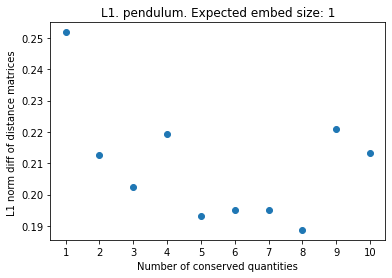

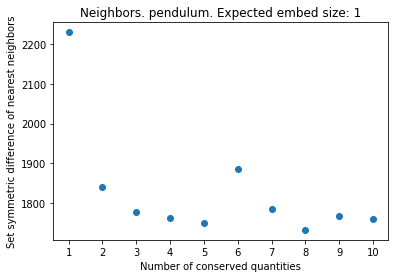

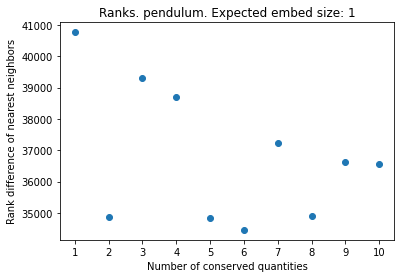

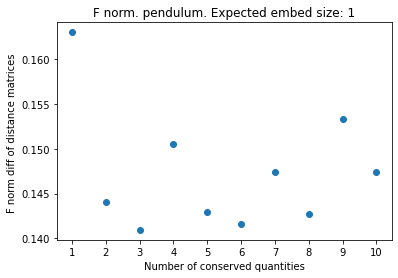

In [8]:
full_run("pendulum", 1)

100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


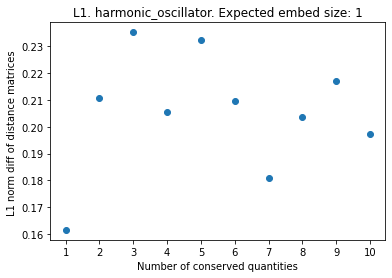

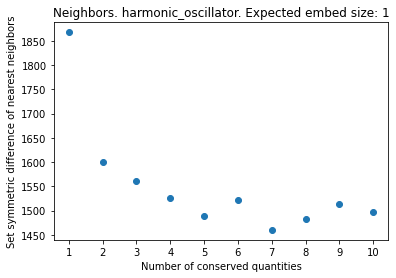

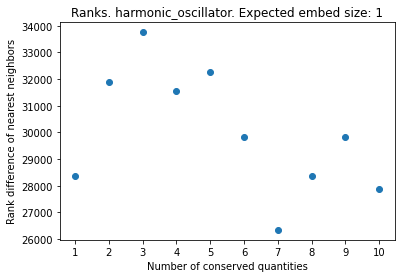

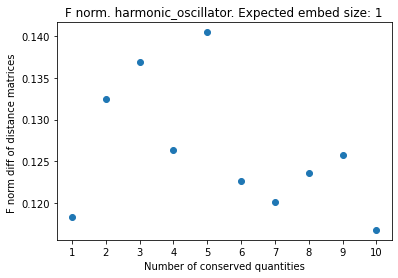

In [9]:
full_run("harmonic_oscillator", 1)

100%|██████████| 10/10 [00:27<00:00,  2.75s/it]


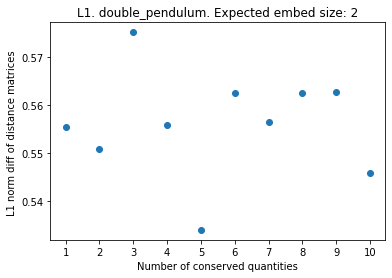

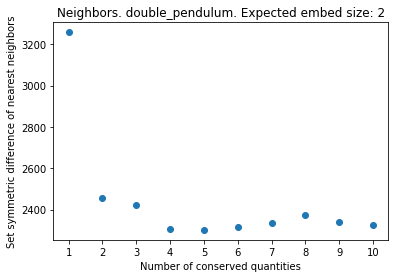

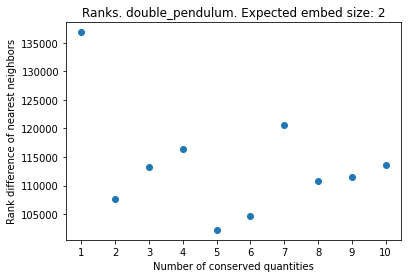

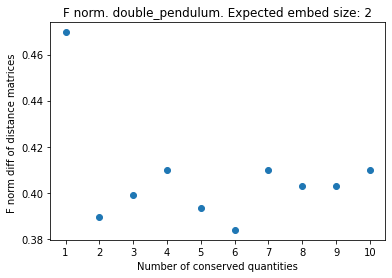

In [10]:
full_run("double_pendulum", 2)

100%|██████████| 10/10 [00:25<00:00,  2.53s/it]


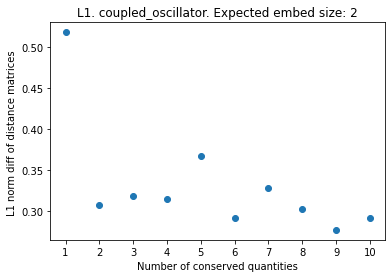

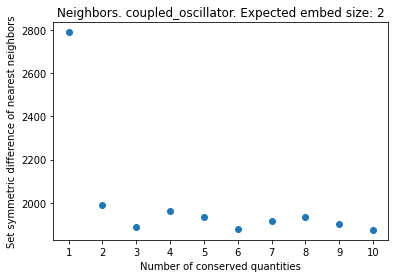

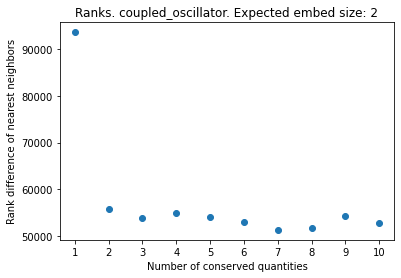

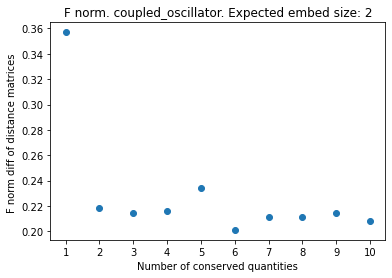

In [11]:
full_run("coupled_oscillator", 2)

100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


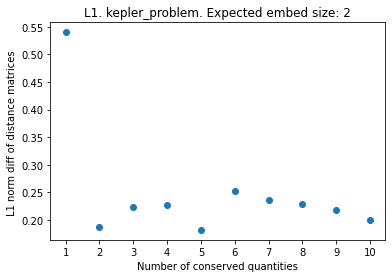

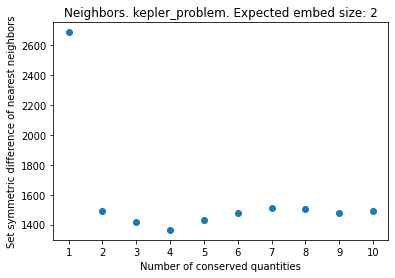

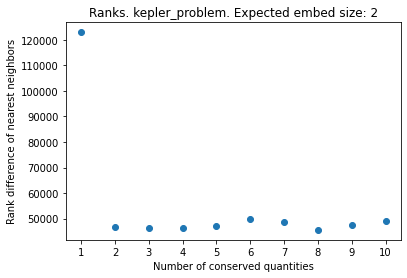

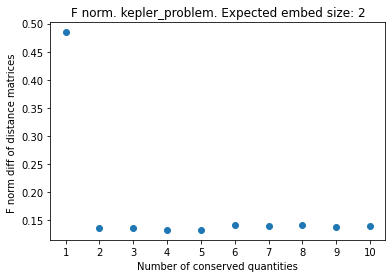

In [12]:
full_run("kepler_problem", 2)